In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-1000-social-media-channels/social media influencers-TIKTOK - ---DEC 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - Tiktok sep 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - Youtube sep-2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-instagram june 2022 - june 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-youtube - --nov 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-tiktok - ---nov 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - instagram sep-2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-tiktok june 2022 - june 2022.csv
/kaggle/input/top-1000-social-media-channels/social media influencers - tiktok.csv
/kaggle/input/top-1000-social-media-channels/social media influencers-INSTAGRAM - -DEC 2022.csv
/kaggle/input/top-1000-social-media-channels/so

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

#                                               Tiktok 2022

# Content creators in TikTok have various features in their interface, but for obvious reasons these features are not included in the dataset, as the dataset focuses primarily on the popularity of the creator rather than other variables.

In [3]:
df_tiktok = pd.read_csv("/kaggle/input/top-1000-social-media-channels/social media influencers - tiktok.csv")
df_youtube = pd.read_csv("/kaggle/input/top-1000-social-media-channels/social media influencers - youtube.csv")
df_instagram = pd.read_csv("/kaggle/input/top-1000-social-media-channels/social media influencers - instagram.csv")

df_tiktok.head(4)

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K


In [4]:
df_tiktok.nunique()

Tiktoker name        987
Tiktok name          980
Subscribers count    412
Views avg.           126
Likes avg            883
Comments avg.        228
Shares avg           385
dtype: int64

# I note that the data that corresponds to the average number of times that users save videos as favorites was not included in the data set.

> **It also does not have the categories of the accounts**

In [5]:
df_tiktok.shape

(1000, 7)

In [6]:
df_tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tiktoker name      1000 non-null   object
 1   Tiktok name        998 non-null    object
 2   Subscribers count  1000 non-null   object
 3   Views avg.         1000 non-null   object
 4   Likes avg          1000 non-null   object
 5   Comments avg.      1000 non-null   object
 6   Shares avg         1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [7]:
df_tiktok.describe()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
count,1000,998,1000,1000,1000,1000,1000
unique,987,980,412,126,883,228,385
top,tommyinnit,Tommy,1.6M,1.7M,1.2M,1.2K,1.3K
freq,2,3,21,52,9,42,30


In [8]:
# Convert an object to an int and add new columns
def data_to_numeric(df, column_list):
    for column_name in column_list:
        new_column_name = 'new_' + column_name
        if new_column_name not in df.columns:

            if df[column_name].dtype == 'object':
                df[new_column_name] = df[column_name].apply(str)
                df[new_column_name] = df[new_column_name].apply(lambda x: x.replace('M', '') if 'M' in x else x)
                df[new_column_name] = df[new_column_name].apply(lambda x: x.replace('K', '') if 'K' in x else x)
                df[new_column_name] = pd.to_numeric(df[new_column_name], downcast='integer')
                df[new_column_name] = np.where(df[column_name].str.contains('M'), df[new_column_name] * 1000000, 
                                                 np.where(df[column_name].str.contains('K'), df[new_column_name] * 1000, df[new_column_name]))
                df[new_column_name] = df[new_column_name].astype(int)
    return df
df_tiktok = data_to_numeric(df_tiktok, ['Subscribers count', 'Views avg.', 'Likes avg', 'Comments avg.', 'Shares avg'])
# df_tiktok.drop('new_Subscribers count', axis=1, inplace=True)
df_tiktok.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,new_Subscribers count,new_Views avg.,new_Likes avg,new_Comments avg.,new_Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K,221700,26000000,2800000,29400,116400
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K,22200000,25400000,5000000,36700,46800
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K,2100000,20700000,3500000,38800,33900
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K,135400000,18700000,2600000,54700,35200
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K,11400000,24800000,2600000,32700,26800


/tmp/ipykernel_32/4279696904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_tiktok["new_Subscribers count"])


<Axes: xlabel='new_Subscribers count', ylabel='Density'>

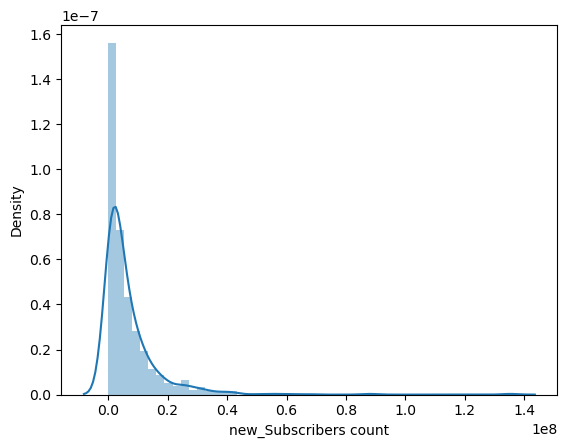

In [9]:
sns.distplot(df_tiktok["new_Subscribers count"])

# The most followed Top 15 Tikokers

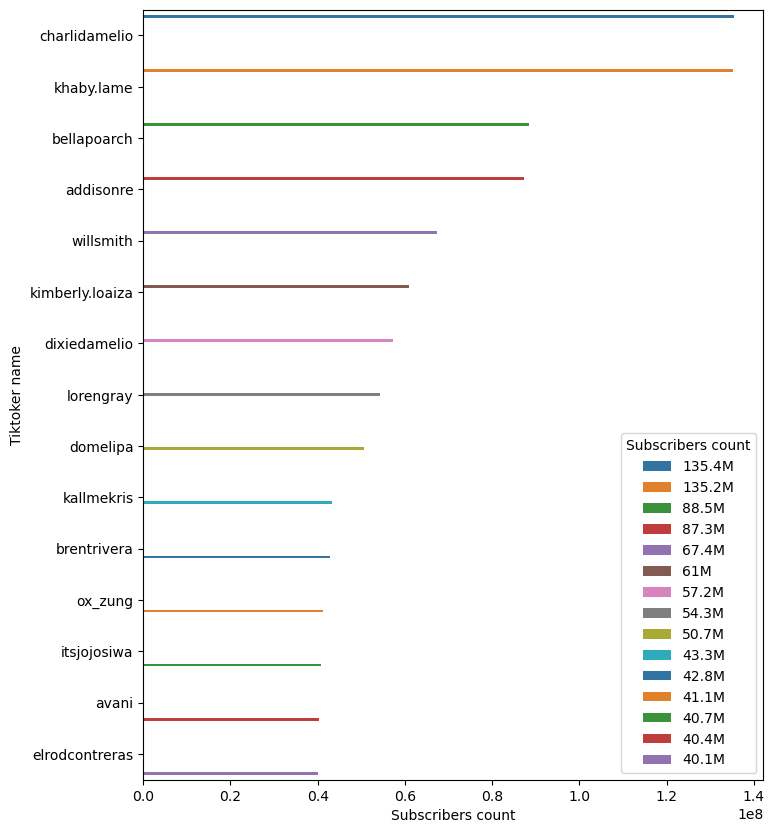

In [10]:
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='Tiktoker name',x='new_Subscribers count',data=df_tiktok.sort_values(by='new_Subscribers count',ascending=False).head(15), hue= 'Subscribers count', palette="tab10", clip_on=False)
graph.set(xlabel="Subscribers count", ylabel="Tiktoker name")
plt.show()

# Top 15 most liked Tikokers

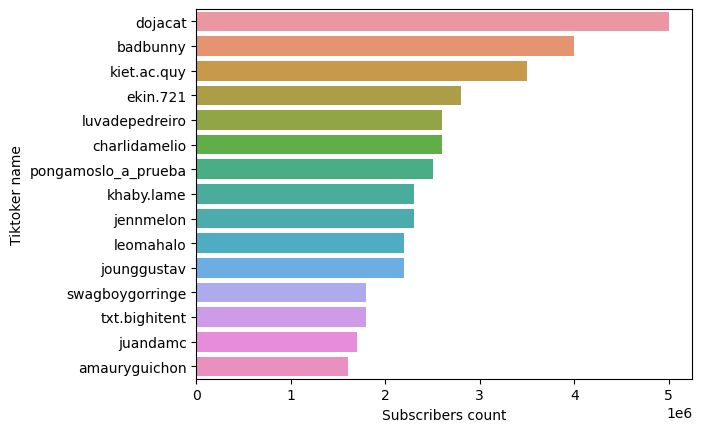

In [11]:
graph = sns.barplot(y='Tiktoker name',x='new_Likes avg',data=df_tiktok.sort_values(by='new_Likes avg',ascending=False).head(15))
graph.set(xlabel="Subscribers count", ylabel="Tiktoker name")
plt.show()

# Top 15 most viewed Tikokers

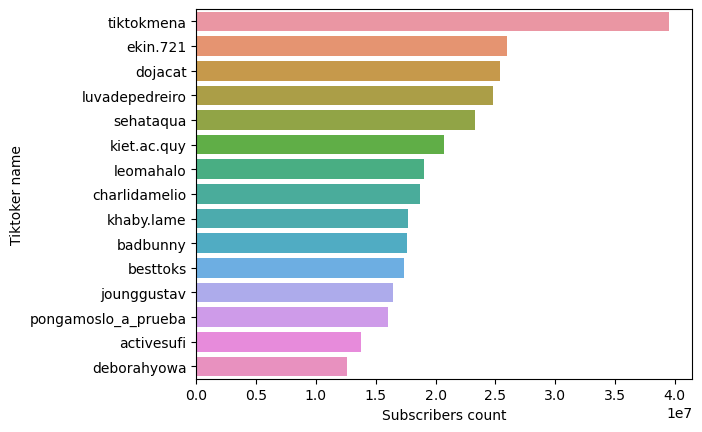

In [12]:
data=df_tiktok.sort_values(by='new_Views avg.',ascending=False).head(15)
graph = sns.barplot(y='Tiktoker name',x='new_Views avg.', data = data)
graph.set(xlabel="Subscribers count", ylabel="Tiktoker name")
plt.show()

# Top 15 most shared Tikokers

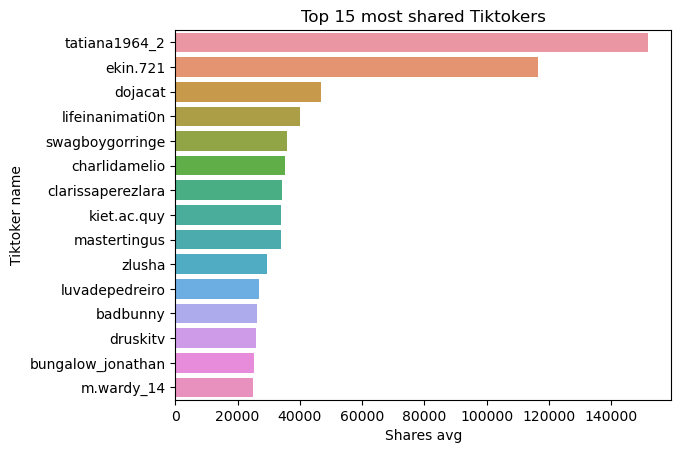

In [13]:
data = df_tiktok.sort_values(by='new_Shares avg',ascending=False).head(15)
graph = sns.barplot(y='Tiktoker name',x='new_Shares avg', data=data)
plt.title("Top 15 most shared Tiktokers")
plt.xlabel("Shares avg")
plt.show()

# Youtube 2022

In [14]:
df_youtube.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


# As in Tiktok, YouTubers have other data, some of which is private and others of which are not added because their focus is on data related to popularity.

In [15]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Category          723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   avg views         1000 non-null   object
 6   avg likes         962 non-null    object
 7   avg comments      791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


In [16]:
df_youtube.isnull().sum()

youtuber name         0
channel name          0
Category            277
Subscribers           0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [17]:
df_youtube.describe()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
count,1000,1000,723,1000,839,1000,962,791
unique,998,998,23,228,27,743,615,420
top,PrestonPlayz,Bollywood Classics,Music & Dance,10.1M,United States,1.1M,1.2K,1.8K
freq,2,2,224,34,291,18,17,14


# The dataset does not record the number of videos shared or downloaded.

In [22]:
# Convert an object to an int and add new columns
df_youtube = data_to_numeric(df_youtube, ['Subscribers', 'avg views', 'avg likes', 'avg comments'])
df_youtube = df_youtube.fillna("Unknow")
df_youtube.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments,new_Subscribers,new_avg views,new_avg likes,new_avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290,212100000,323700,9.8,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,Unknow,13.8M,80.9K,Unknow,132100000,13800000,80.9,nan
2,setindia,SET India,Unknow,130.4M,India,23.6K,314,21,130400000,23600,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K,111400000,1400000,80.8,4.6
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K,92500000,30600000,1.7,67.7


/tmp/ipykernel_32/1811823775.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_youtube["new_Subscribers"])


<Axes: xlabel='new_Subscribers', ylabel='Density'>

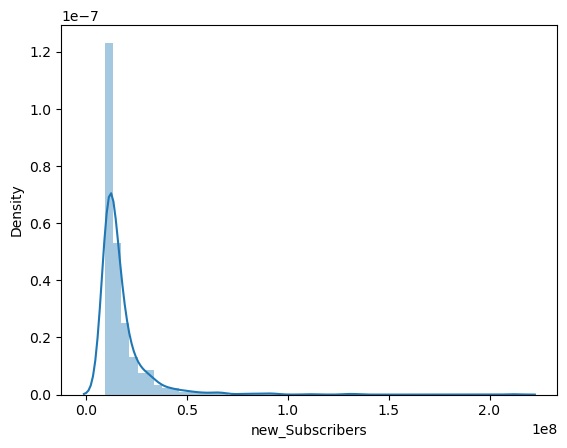

In [23]:
sns.distplot(df_youtube["new_Subscribers"])

# Top 15 most followers Youtubers

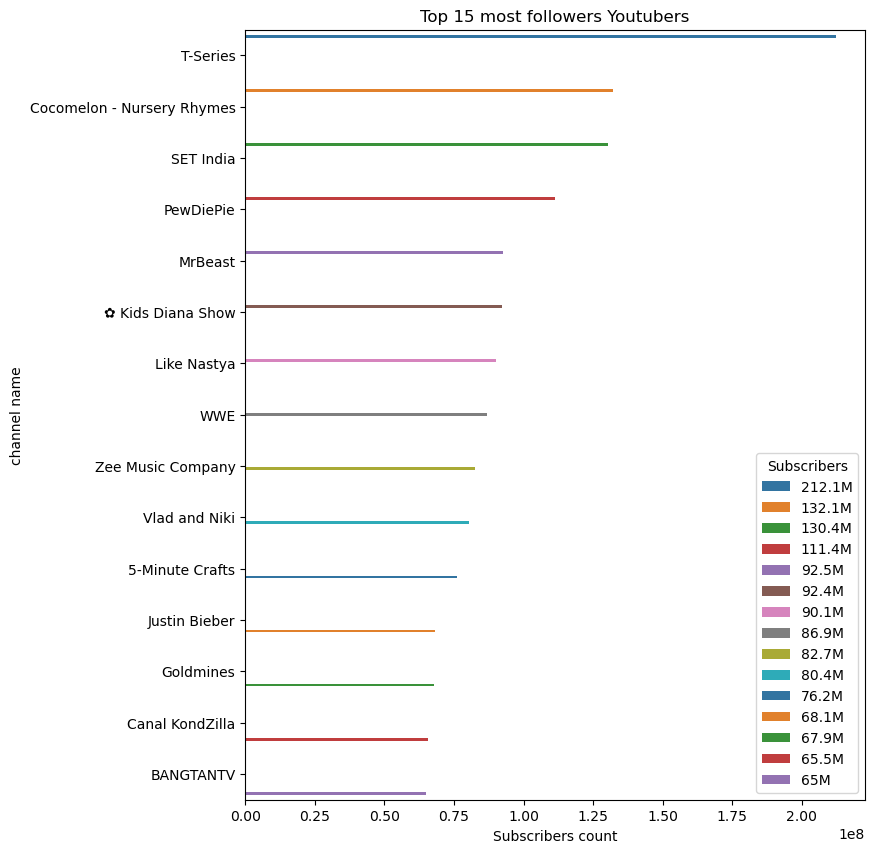

In [24]:
data = df_youtube.sort_values(by='new_Subscribers',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='channel name',x='new_Subscribers',data= data, hue= 'Subscribers', palette="tab10", clip_on=False)
graph.set(xlabel="Subscribers count", title = "Top 15 most followers Youtubers")
plt.show()

# Top 15 most viewed Youtubers

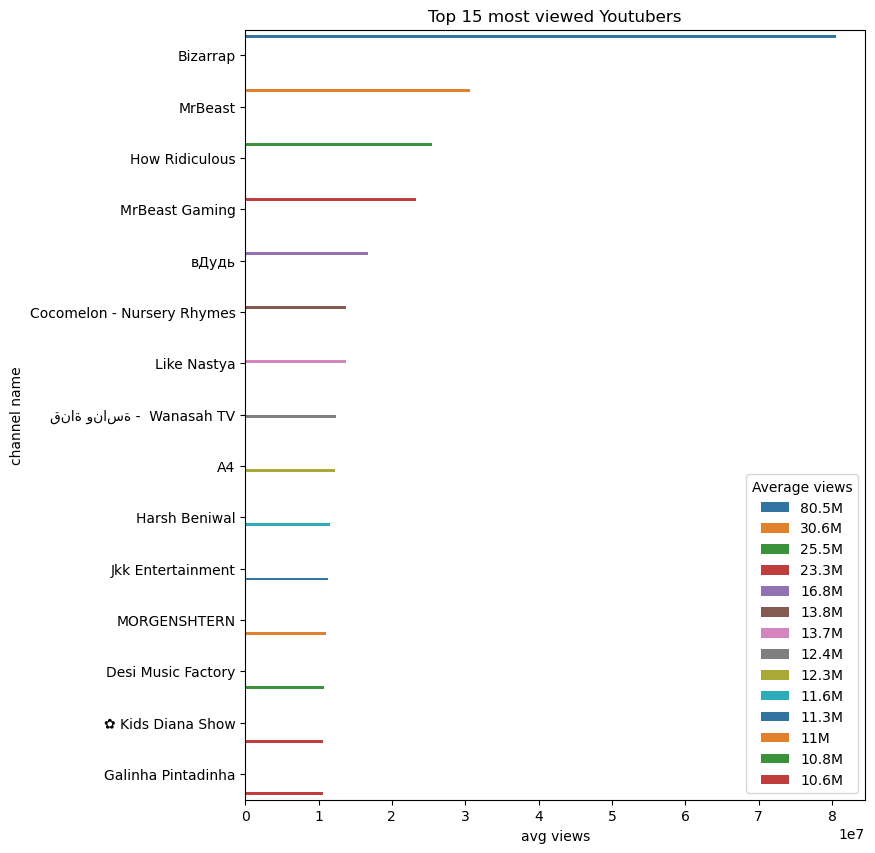

In [25]:
data = df_youtube.sort_values(by='new_avg views',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='channel name', x='new_avg views', data=data, hue='avg views', palette="tab10")
graph.set(xlabel="avg views", title="Top 15 most viewed Youtubers")
plt.legend(title='Average views')
plt.show()

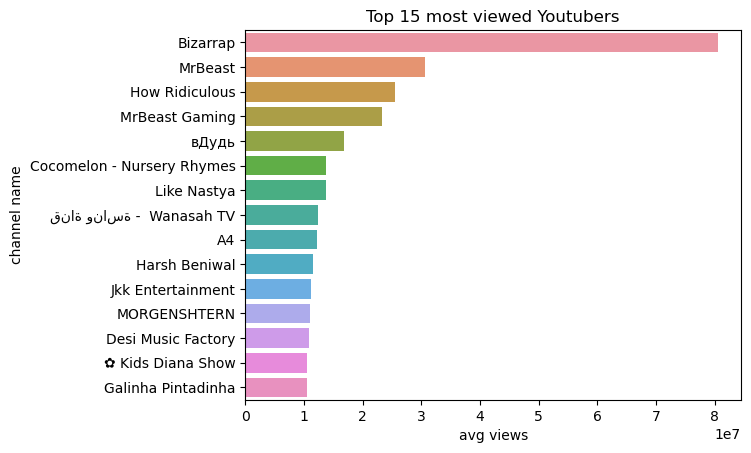

In [26]:
data = df_youtube.sort_values(by='new_avg views',ascending=False).head(15)
graph = sns.barplot(y='channel name', x='new_avg views', data=data)
graph.set(xlabel="avg views", title="Top 15 most viewed Youtubers")
plt.show()

# Most viewed categories

/tmp/ipykernel_32/943309748.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  gráfico = sns.barplot(y= 'Category' , x = 'new_avg views', data=data, ci = None)


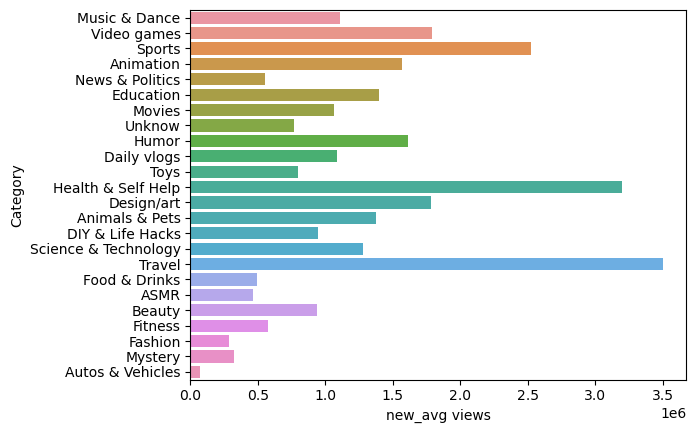

In [27]:
data = df_youtube.sort_values(by='new_avg views',ascending=False)
gráfico = sns.barplot(y= 'Category' , x = 'new_avg views', data=data, ci = None)
graph.set(xlabel="avg views", title="Top 20 most viewed categories")
plt.savefig("most_viewed_categories_Youtube")
plt.show()

# Categories with more subscribers

/tmp/ipykernel_32/1073601378.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(y='Category', x='new_Subscribers', data=data, ci = None)


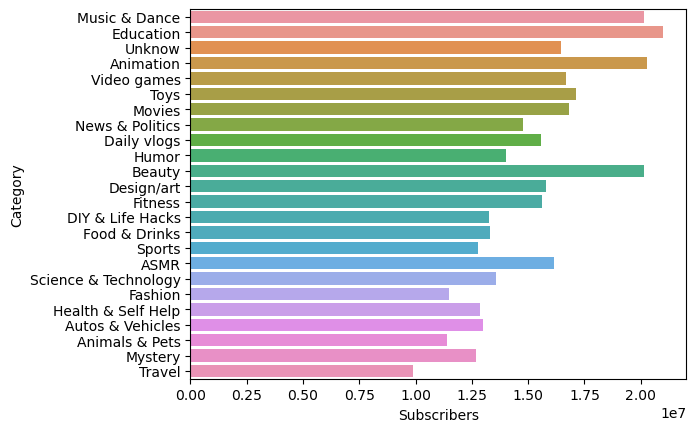

In [28]:
data = df_youtube.sort_values(by='new_Subscribers',ascending=False)
# plt.figure(figsize = (12, 10))
graph = sns.barplot(y='Category', x='new_Subscribers', data=data, ci = None)
graph.set(xlabel="Subscribers")
plt.show()

# Instagram 2022

In [29]:
df_instagram.shape

(1000, 8)

In [30]:
df_instagram.head(2)

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K


**Instagram does not provide aggregate data on average "Likes", "Views" and "Comments". This is in contrast to the previous two data sets, which did provide this information. Instead, Instagram provides data on the number of followers and encapsulates the average number of likes, comments and views in a single column.
Engagement avg\r\n: This is a avergage of likes, views and comments of publications.**

> The code "Engagement avg\r\n" represents the average engagement rate of a social media post. The word "Engagement" refers to the number of likes, comments, and shares a post has received. The word "avg" refers to the average, which is calculated by dividing the total number of interactions by the number of posts. The "\r\n" character indicates the end of the line.**
> 
> For example, if a post has received 100 likes, 50 comments, and 25 shares, the average engagement rate would be 35 engagements per post. The code would be "Engagement avg\r\n35".
> 
> This code can be used to track the average engagement rate of a social media account over time, to compare the engagement rates of different accounts, or to identify which posts are performing well and which could be improved.
>
> Authentic engagement is a genuine and meaningful type of interaction. It is about connecting with people at a deeper level, beyond the mere exchange of information. Authentic engagement is characterized by the following: 
> Mutual respect and understanding.
> Open and honest communication. 
> Willingness to learn and grow. 


In [31]:
df_instagram.describe()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [32]:
df_instagram.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [33]:
df_instagram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [34]:
df_instagram = data_to_numeric(df_instagram, ['Followers', 'Authentic engagement\r\n', 'Engagement avg\r\n'])
df_instagram = df_instagram.fillna("Unknow")
df_instagram.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n,new_Followers,new_Authentic engagement\r\n,new_Engagement avg\r\n
0,433,433,Sports with a ball,Unknow,48.5M,Spain,383.1K,637K,48500000,383100,637000
1,__youngbae__,TAEYANG,Music,Unknow,12.7M,Indonesia,478K,542.3K,12700000,478000,542300
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,Unknow,18.8M,Russia,310.8K,377.9K,18800000,310800,377900
3,_imyour_joy,Joy,Lifestyle,Unknow,13.5M,Indonesia,1.1M,1.4M,13500000,1100000,1400000
4,_jeongjaehyun,Jaehyun,Unknow,Unknow,11.1M,Indonesia,2.5M,3.1M,11100000,2500000,3100000


/tmp/ipykernel_32/1448186012.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_instagram["new_Followers"])


<Axes: xlabel='new_Followers', ylabel='Density'>

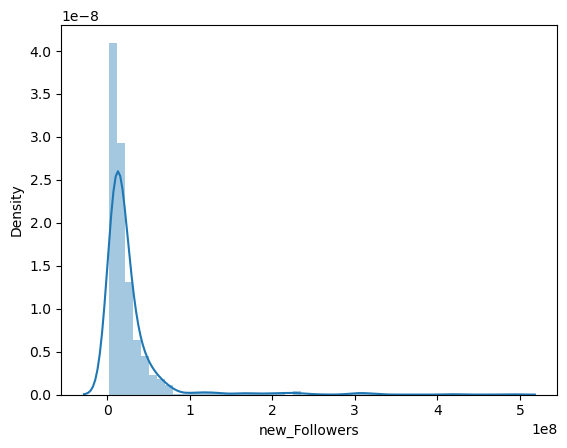

In [35]:
sns.distplot(df_instagram["new_Followers"])

# Top 16 most followers Instagramers

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


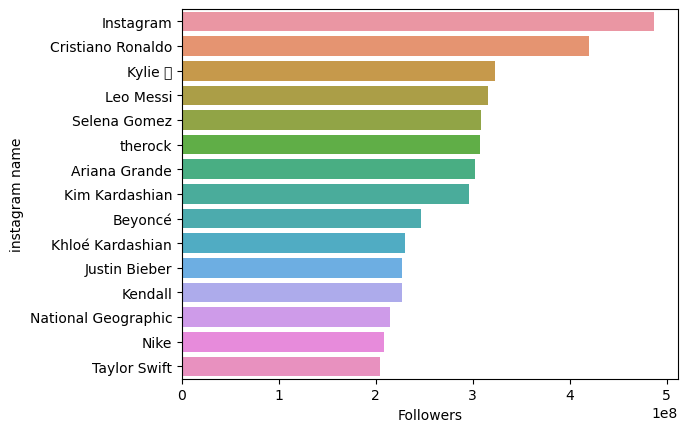

In [36]:
data = df_instagram.sort_values(by='new_Followers',ascending=False).head(16)
graph = sns.barplot(y='instagram name', x='new_Followers', data=data)
graph.set(xlabel="Followers")
plt.show()

/tmp/ipykernel_32/3866816307.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(y='category_1', x='new_Followers', data=data, ci = None)


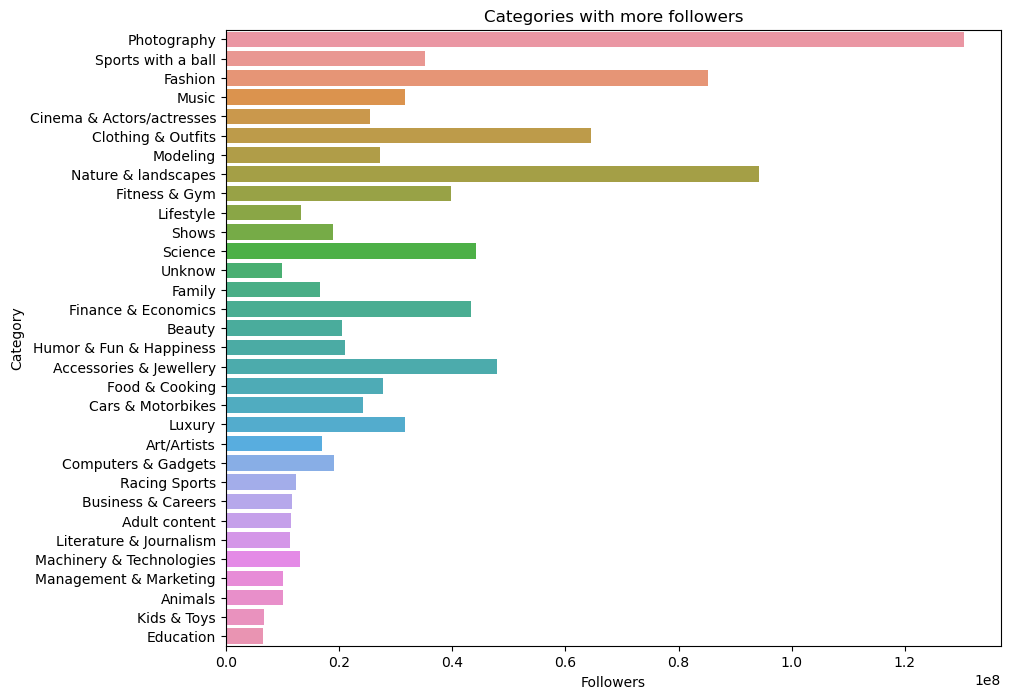

In [37]:
data = df_instagram.sort_values(by='new_Followers',ascending=False)
plt.figure(figsize = (10, 8))
graph = sns.barplot(y='category_1', x='new_Followers', data=data, ci = None)
graph.set(xlabel="Followers", ylabel = 'Category', title = 'Categories with more followers')
plt.show()

/tmp/ipykernel_32/550848246.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.barplot(y='category_1', x='new_Engagement avg\r\n', data=data, ci = None)


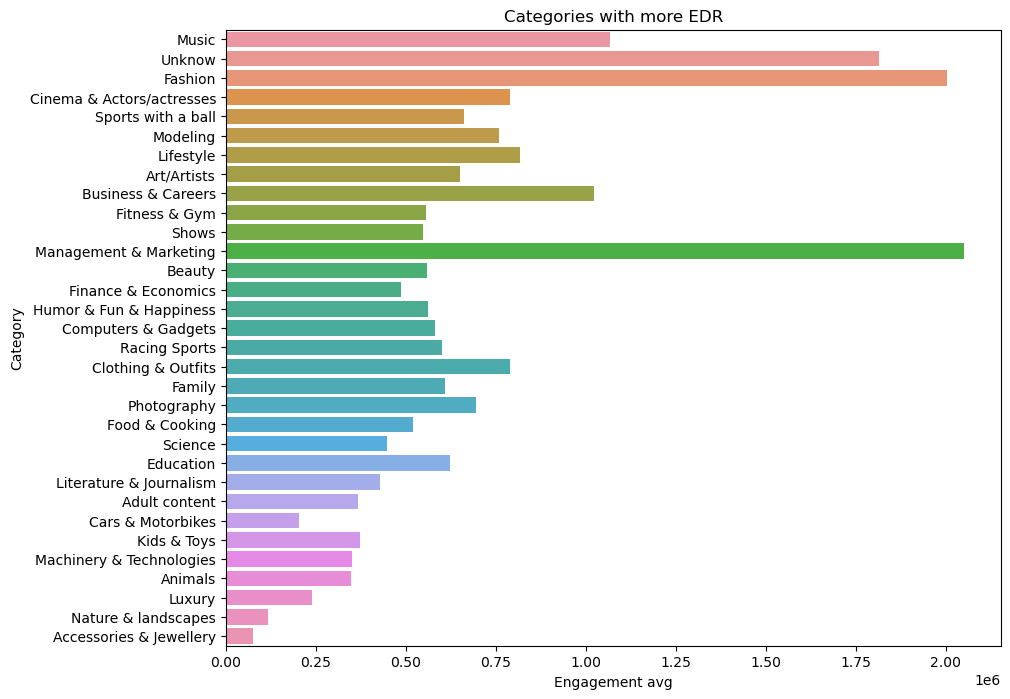

In [38]:
data = df_instagram.sort_values(by='new_Engagement avg\r\n',ascending=False)
plt.figure(figsize = (10, 8))
graph = sns.barplot(y='category_1', x='new_Engagement avg\r\n', data=data, ci = None)
graph.set(xlabel="Engagement avg", ylabel = 'Category', title = 'Categories with more EDR')
plt.show()